In [6]:
import os
import pandas as pd

df = pd.read_csv("/home/ajay/Documents/sleeping_dog_don/Lung_cancer_detection/dataset_med.csv")
df.head()
print(df.columns.tolist())


['id', 'age', 'gender', 'country', 'diagnosis_date', 'cancer_stage', 'family_history', 'smoking_status', 'bmi', 'cholesterol_level', 'hypertension', 'asthma', 'cirrhosis', 'other_cancer', 'treatment_type', 'end_treatment_date', 'survived']


In [7]:
if 'id' in df.columns:
    df.drop('id', axis=1, inplace=True)

if "diagnosis_date" in df.columns and 'end_treatment_date' in df.columns :
    df["diagnosis_date"]= pd.to_datetime(df['diagnosis_date'])
    df['end_treatment_date']= pd.to_datetime(df['end_treatment_date'])

    #CReating New Column since we need exact no of days survived

    df["treatment_duration"] = (df['end_treatment_date']-df["diagnosis_date"]).dt.days

    df.drop(['diagnosis_date','end_treatment_date'],axis=1,inplace=True)

    df.fillna(df.mode().iloc[0],inplace=True)

df.head()

,age,gender,country,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,survived,treatment_duration
0,64.0,Male,Sweden,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,0,523
1,50.0,Female,Netherlands,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,1,424
2,65.0,Female,Hungary,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,0,370
3,51.0,Female,Belgium,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,0,443
4,37.0,Male,Luxembourg,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,0,406


In [8]:
from sklearn.preprocessing import LabelEncoder , StandardScaler

categorical_columns = ['gender','country','cancer_stage','family_history','smoking_status','hypertension',
                       'asthma','cirrhosis','other_cancer','treatment_type','survived']

lencoder = LabelEncoder()

for columns in categorical_columns :
    df[columns] = lencoder.fit_transform(df[columns])

df.head()


,age,gender,country,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,survived,treatment_duration
0,64.0,1,26,0,1,3,29.4,199,0,0,1,0,0,0,523
1,50.0,0,19,2,1,3,41.2,280,1,1,0,0,3,1,424
2,65.0,0,12,2,1,1,44.0,268,1,1,0,0,1,0,370
3,51.0,0,1,0,0,3,43.0,241,1,1,0,0,0,0,443
4,37.0,1,17,0,0,3,19.7,178,0,0,0,0,1,0,406


In [9]:
sscaler = StandardScaler()

numerical_columns = ['age','bmi','cholesterol_level','treatment_duration']

df[numerical_columns] = sscaler.fit_transform(df[numerical_columns])

df.head()

,age,gender,country,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,survived,treatment_duration
0,0.899796,1,26,0,1,3,-0.130748,-0.797424,0,0,1,0,0,0,0.465906
1,-0.500977,0,19,2,1,3,1.279296,1.067550,1,1,0,0,3,1,-0.244658
2,0.999851,0,12,2,1,1,1.613882,0.791257,1,1,0,0,1,0,-0.632238
3,-0.400922,0,1,0,0,3,1.494387,0.169599,1,1,0,0,0,0,-0.108287
4,-1.801696,1,17,0,0,3,-1.289852,-1.280936,0,0,0,0,1,0,-0.373851


In [12]:
from sklearn.model_selection import train_test_split
X = df.drop('survived',axis=1)
y = df['survived']
"""
X_train ,X_test , y_train , y_test = train_test_split(X , y , test_size= 0.2 , random_state= 42 )
"""

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)



X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,test_size=0.2 , random_state=42)





In [13]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(class_weight=None,random_state=42)
model.fit(X_train,y_train)


RandomForestClassifier(random_state=42)

Accuracy : 0.80925723795835

 Classification Repoort 
 :               precision    recall  f1-score   support

           0       0.80      0.83      0.81    138614
           1       0.82      0.79      0.81    138985

    accuracy                           0.81    277599
   macro avg       0.81      0.81      0.81    277599
weighted avg       0.81      0.81      0.81    277599

ROC-AUC SCORE : 0.8811956814847721


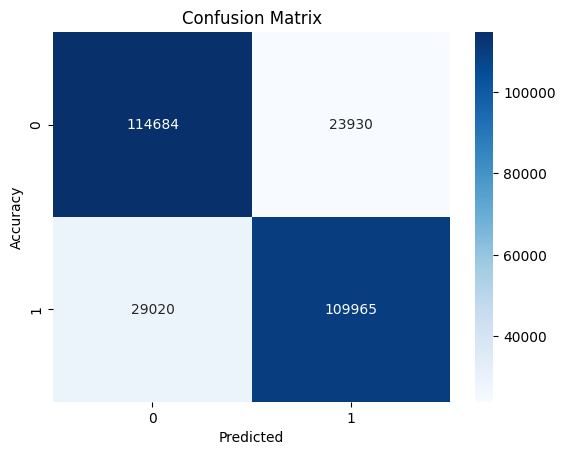

survived
0    693996
1    196004
Name: count, dtype: int64


In [14]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

print(f"Accuracy : {accuracy_score(y_test,y_pred)}")
print(f"\n Classification Repoort \n : {classification_report(y_test,y_pred)}")
print(f"ROC-AUC SCORE : {roc_auc_score(y_test,y_prob)}")

import seaborn as sns

sns.heatmap(confusion_matrix(y_test , y_pred),annot = True ,fmt = 'd', cmap = 'Blues')

import matplotlib.pyplot as plt

plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Accuracy")
plt.show()

print(df['survived'].value_counts())


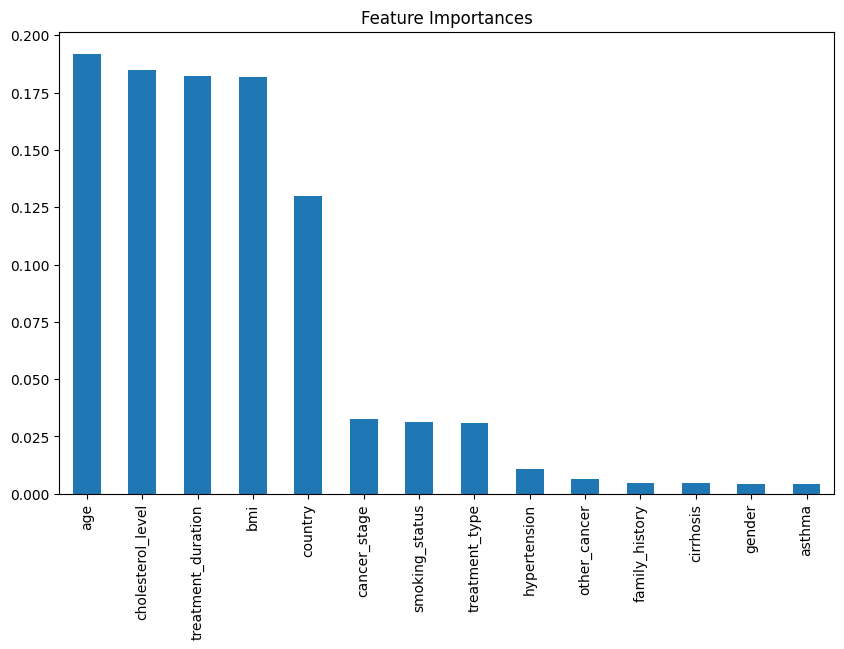

In [15]:
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(10,6))
plt.title("Feature Importances")
plt.show()


